# Import packages and functions

In [1]:
import sys
# force the notebook to look for files in the upper level directory
sys.path.insert(1, '../')

In [2]:
import pandas as pd
import seaborn as sns
from data.data_cleaning import remove_nullrows, mean_imputation, abbreviate_features, remove_redundant_features

# Define Path Constants

In [3]:
RAW_PATH = "../data/unprocessed/IMT_Classification_Dataset_matminer_and_handbuilt_v3.xlsx"
SAVE_PATH = "../data/processed/IMT_Classification_Dataset_Processed_v3.xlsx"

# Exploratory Data Analysis

## 1. Read in the [unprocessed dataset](https://github.com/rpw199912j/mit_model_code/blob/master/data/unprocessed/IMT_Classification_Dataset_matminer_and_handbuilt_v3.xlsx)

In [4]:
df_raw = pd.read_excel(RAW_PATH)
df_raw

,Compound,Label,struct_file_path,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,...,max_xx_dists,min_xx_dists,avg_xx_dists,v_m,v_x,iv,iv_p1,est_hubbard_u,est_charge_trans,volumn_per_sites
0,SrRuO3,0,../data/Structures/Metals/SrRuO3_75561.cif,8,44,36,21.200000,15.840000,8,8,...,3.579973,2.760023,2.947568,-44.758483,23.738172,45.000000,59.00000,10.330721,8.528538,12.089967
1,OsO2,0,../data/Structures/Metals/OsO2_15070.cif,8,76,68,30.666667,30.222222,8,57,...,2.805520,2.442651,2.684563,-44.387080,25.269881,41.000000,55.00000,9.953087,13.687869,10.747095
2,SrLaCuO4,0,../data/Structures/Metals/LaSrCuO4_10252.cif,8,57,49,22.285714,16.326531,8,8,...,3.421841,2.662257,2.966018,-19.950928,23.905465,36.841000,57.38000,18.524833,-7.676036,13.436088
3,SrCrO3,0,../data/Structures/Metals/SrCrO3_245834.cif,8,38,30,17.200000,11.040000,8,8,...,2.701006,2.701006,2.701006,-46.659812,24.337085,49.160000,69.46000,16.530261,6.587419,11.146843
4,CrO2,0,../data/Structures/Metals/CrO2_202836.cif,8,24,16,13.333333,7.111111,8,49,...,2.688819,2.471404,2.616347,-46.102564,26.561430,49.160000,69.46000,16.126339,8.220233,9.504907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,YbFe4(CuO4)3,2,../data/Structures/MIT_materials/HighT/YbCu3Fe...,8,70,62,17.850000,11.820000,8,39,...,2.924013,2.552849,2.744642,-33.639068,24.360992,36.841000,57.38000,16.597335,7.361997,9.750947
225,NiSeS,2,../data/Structures/MIT_materials/HighT/NiS(2-x...,16,34,18,26.000000,6.666667,16,61,...,3.287898,2.376963,3.060164,-18.496007,9.778249,18.168838,35.18700,13.516153,-0.564936,16.385810
226,Ti2O3,2,../data/Structures/MIT_materials/HighT/Ti2O3_H...,8,22,14,13.600000,6.720000,8,43,...,2.900002,2.771288,2.844355,-33.753924,24.648770,27.491710,43.26717,11.068473,16.170622,10.490597
227,Ca1.2La2.8Mn4O12,2,../data/Structures/MIT_materials/HighT/La0.7Ca...,8,57,49,18.980000,13.176000,8,7,...,3.516261,2.747250,2.906344,-23.450159,22.934073,38.930600,57.57000,14.915598,-7.594053,11.576092


We can see that there are 229 rows and 167 columns. Since the `Compound` and `struct_file_path` columns are not predictors and `Label` column is the target/response column, we have **229** compounds and **164** predictors in the unprocessed dataset.

## 2. Explore missing values

In [5]:
columns_na_info = pd.DataFrame(df_raw.isna().sum(), columns=["num_na"])

In [6]:
columns_na_info[columns_na_info.num_na != 0]

,num_na
minimum oxidation state,19
maximum oxidation state,19
range oxidation state,19
std_dev oxidation state,19
gii,56
max_mm_dists,1
min_mm_dists,1
avg_mm_dists,1
max_mx_dists,1
min_mx_dists,1


## 3. Explore target variable

In [7]:
df_raw.Label.value_counts()

2    110
1     86
0     33
Name: Label, dtype: int64

Here is a table that shows what each value mean in the target variable

|value|meaning|
|:----|:------|
|2    |MIT    |
|1    |Insulator|
|0    |Metal  |

We can immediately see that if we were to make a classification model, the input dataset will **imbalanced**.

## 4. Predictor correlation

### Randomly sample 10 features to create a correlation matrix

In [8]:
corr_df = df_raw.drop(columns="Label").sample(n=10, axis=1, random_state=31415926).corr()

### Make a heatmap

<AxesSubplot:>

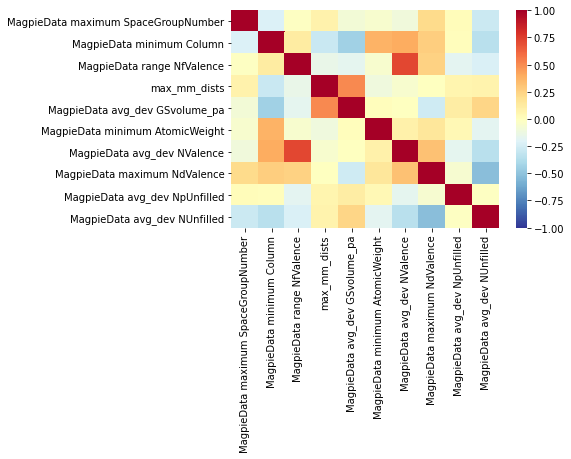

In [9]:
sns.heatmap(corr_df, vmin=-1, vmax=1, center=0, cmap="RdYlBu_r")

# Data cleaning workflow

## 1. Remove rows with at least 6 NaN values

In [10]:
df_processed = remove_nullrows(df_raw, 6)

In [11]:
df_processed.shape[0] - df_raw.shape[0]

-1

We can see that we only dropped 1 row after this step

## 2. Impute the missing values with the mean of the corresponding feature

In [12]:
df_processed = mean_imputation(df_processed)

We can also confirm if all the missing values are indeed filled with mean values.

In [13]:
pd.DataFrame(df_processed.isna().sum(), columns=["num_na"])[columns_na_info.num_na != 0]

,num_na
minimum oxidation state,0
maximum oxidation state,0
range oxidation state,0
std_dev oxidation state,0
gii,0
max_mm_dists,0
min_mm_dists,0
avg_mm_dists,0
max_mx_dists,0
min_mx_dists,0


## 3. Rename the columns for easier readability and plotting

In the heatmap, you might see that there are feautures with a "MagpieData" prefix. This step delete all those prefixes from the variable names.

In [14]:
df_processed = abbreviate_features(df_processed)

## 4. Remove columns with zero variance and high correlations

In [15]:
df_processed = remove_redundant_features(df_processed)

In [16]:
df_processed.shape[1] - df_raw.shape[1]

-72

Just by removing the highly correlated columns, we reduce the number of columns by 72.

## 5. Save the processed dataset

In [17]:
df_processed.to_excel(SAVE_PATH, index=False)
df_processed

,Compound,Label,struct_file_path,range MendeleevNumber,avg_dev MendeleevNumber,range AtomicWeight,mean AtomicWeight,avg_dev AtomicWeight,range MeltingT,mean MeltingT,...,avg_mx_dists,max_xx_dists,min_xx_dists,avg_xx_dists,v_x,iv,iv_p1,est_hubbard_u,est_charge_trans,volumn_per_sites
0,SrRuO3,0,../data/Structures/Metals/SrRuO3_75561.cif,79,26.400000,85.07060,47.337640,37.605888,2552.20,764.280000,...,1.983938,3.579973,2.760023,2.947568,23.738172,45.000000,59.00000,10.330721,8.528538,12.089967
1,OsO2,0,../data/Structures/Metals/OsO2_15070.cif,30,13.333333,174.23060,74.076267,77.435822,3251.20,1138.533333,...,1.983671,2.805520,2.442651,2.684563,25.269881,41.000000,55.00000,9.953087,13.687869,10.747095
2,SrLaCuO4,0,../data/Structures/Metals/LaSrCuO4_10252.cif,79,29.346939,122.90607,50.581296,39.522167,1302.97,545.710000,...,2.062565,3.421841,2.662257,2.966018,23.905465,36.841000,57.38000,18.524833,-7.676036,13.436088
3,SrCrO3,0,../data/Structures/Metals/SrCrO3_245834.cif,79,28.080000,71.62060,37.522860,25.828152,2125.20,678.880000,...,1.909900,2.701006,2.701006,2.701006,24.337085,49.160000,69.46000,16.530261,6.587419,11.146843
4,CrO2,0,../data/Structures/Metals/CrO2_202836.cif,38,16.888889,35.99670,27.998300,15.998533,2125.20,763.200000,...,1.901255,2.688819,2.471404,2.616347,26.561430,49.160000,69.46000,16.126339,8.220233,9.504907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,YbFe4(CuO4)3,2,../data/Structures/MIT_materials/HighT/YbCu3Fe...,48,14.700000,157.05460,38.953240,27.544608,1756.20,653.345500,...,2.365615,2.924013,2.552849,2.744642,24.360992,36.841000,57.38000,16.597335,7.361997,9.750947
225,NiSeS,2,../data/Structures/MIT_materials/HighT/NiS(2-x...,28,12.222222,46.89500,56.572800,16.338533,1339.64,870.120000,...,2.424039,3.287898,2.376963,3.060164,9.778249,18.168838,35.18700,13.516153,-0.564936,16.385810
226,Ti2O3,2,../data/Structures/MIT_materials/HighT/Ti2O3_H...,44,21.120000,31.86760,28.746440,15.296448,1886.20,809.280000,...,2.048209,2.900002,2.771288,2.844355,24.648770,27.491710,43.26717,11.068473,16.170622,10.490597
227,Ca1.2La2.8Mn4O12,2,../data/Structures/MIT_materials/HighT/La0.7Ca...,80,26.592000,122.90607,42.438695,32.010437,1464.20,570.600000,...,1.962424,3.516261,2.747250,2.906344,22.934073,38.930600,57.57000,14.915598,-7.594053,11.576092
